# HW1_Q8_Chami

In [2]:
# imports
import numpy as np
import csv
import matplotlib.pyplot as plt

## a) Naive Bayes Classifier — Maximum Likelihood Estimation

In [4]:
# attention: its lower than 100 lines of code for this part

def train_mle(train_baseball, train_hockey):
    # total word counts in each class
    sum_b = np.sum(train_baseball, axis=0)
    sum_h = np.sum(train_hockey, axis=0)

    # MLE probabilities
    p_b = sum_b / np.sum(sum_b)
    p_h = sum_h / np.sum(sum_h)

    return p_b, p_h

def predict_mle(X, p_b, p_h):
    log_pb = X @ np.log(np.where(p_b == 0, 1, p_b))   # define 0*log0 = 0
    log_ph = X @ np.log(np.where(p_h == 0, 1, p_h))
    preds = []

    for b, h in zip(log_pb, log_ph):
        if h > b:
            preds.append("hockey")
        else:
            preds.append("baseball")  # ties to baseball
    return preds

def accuracy(preds, true_label):
    return np.mean([p == true_label for p in preds])

def load_csv(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        return np.array([[int(x) for x in row] for row in reader])

In [5]:
# load datas
baseball_train = load_csv("baseball_train_set.csv")
hockey_train   = load_csv("hockey_train_set.csv")
baseball_test  = load_csv("baseball_test_set.csv")
hockey_test    = load_csv("hockey_test_set.csv")

In [6]:
p_b, p_h = train_mle(baseball_train, hockey_train)

# predictions
preds_baseball_test = predict_mle(baseball_test, p_b, p_h)
preds_hockey_test   = predict_mle(hockey_test, p_b, p_h)

# accuracy
acc_b = accuracy(preds_baseball_test, "baseball")
acc_h = accuracy(preds_hockey_test, "hockey")
acc_total = (acc_b * 50 + acc_h * 50) / 100

print("Accuracy on baseball test:", acc_b)
print("Accuracy on hockey test:", acc_h)
print("Total accuracy:", acc_total)

print("\nPredictions for baseball_test:", preds_baseball_test[:10], "...")
print("Predictions for hockey_test:", preds_hockey_test[:10], "...")


Accuracy on baseball test: 0.32
Accuracy on hockey test: 0.04
Total accuracy: 0.18

Predictions for baseball_test: ['hockey', 'hockey', 'baseball', 'baseball', 'hockey', 'baseball', 'baseball', 'hockey', 'hockey', 'hockey'] ...
Predictions for hockey_test: ['hockey', 'baseball', 'baseball', 'baseball', 'baseball', 'baseball', 'baseball', 'baseball', 'baseball', 'baseball'] ...


## b)Naive Bayes Classifier — MAP Estimation with Dirichlet Prior

In [7]:
def train_map(train_baseball, train_hockey, beta):
    V = train_baseball.shape[1]  

    # total word counts in each class
    sum_b = np.sum(train_baseball, axis=0)
    sum_h = np.sum(train_hockey, axis=0)

    # MAP probabilities with Dirichlet prior
    p_b = (sum_b + beta) / (np.sum(sum_b) + beta * V)
    p_h = (sum_h + beta) / (np.sum(sum_h) + beta * V)

    return p_b, p_h

def predict_map(X, p_b, p_h):
    log_pb = X @ np.log(np.where(p_b == 0, 1e-12, p_b))
    log_ph = X @ np.log(np.where(p_h == 0, 1e-12, p_h))

    preds = []
    for b, h in zip(log_pb, log_ph):
        if h > b:
            preds.append("hockey")
        else:
            preds.append("baseball")  # ties → baseball
    return preds

def accuracy(preds, true_label):
    return np.mean([p == true_label for p in preds])

def load_csv(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        return np.array([[int(x) for x in row] for row in reader])

## c) Effect of β on Classification Accuracy

β=     0: accuracy = 0.8600
β= 1e-08: accuracy = 0.8700
β= 1e-06: accuracy = 0.8600
β= 0.001: accuracy = 0.8600
β=  0.01: accuracy = 0.8700
β=   0.1: accuracy = 0.8700
β=     1: accuracy = 0.7900
β=     2: accuracy = 0.6500
β=     5: accuracy = 0.5500
β=    10: accuracy = 0.5400


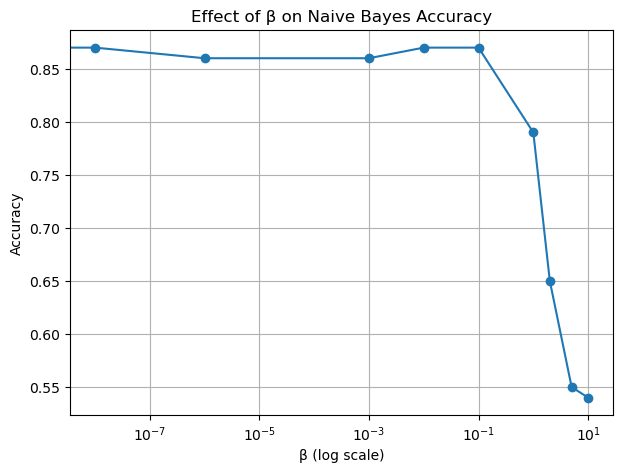

In [8]:
betas = [0, 1e-8, 1e-6, 1e-3, 1e-2, 1e-1, 1, 2, 5, 10]
accuracies = []

for beta in betas:
    p_b, p_h = train_map(baseball_train, hockey_train, beta)

    preds_b = predict_map(baseball_test, p_b, p_h)
    preds_h = predict_map(hockey_test, p_b, p_h)

    acc_b = accuracy(preds_b, "baseball")
    acc_h = accuracy(preds_h, "hockey")

    acc_total = (acc_b*50 + acc_h*50) / 100
    accuracies.append(acc_total)

    print(f"β={beta:>6}: accuracy = {acc_total:.4f}")

plt.figure(figsize=(7,5))
plt.plot(betas, accuracies, marker='o')
plt.xscale("log")
plt.xlabel("β (log scale)")
plt.ylabel("Accuracy")
plt.title("Effect of β on Naive Bayes Accuracy")
plt.grid(True)
plt.show()


## d) Effect of Training Set Size

n =  1: accuracy = 0.4600
n =  5: accuracy = 0.5900
n = 10: accuracy = 0.7500
n = 15: accuracy = 0.6000
n = 20: accuracy = 0.7100
n = 25: accuracy = 0.8100
n = 30: accuracy = 0.8100
n = 35: accuracy = 0.8300
n = 40: accuracy = 0.8400
n = 45: accuracy = 0.8800
n = 50: accuracy = 0.8700


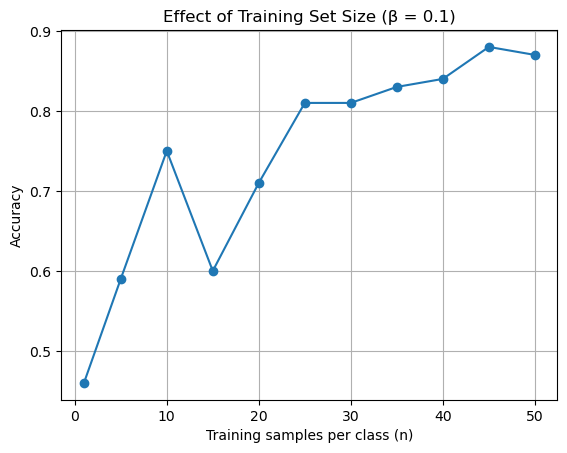

In [9]:
X_test = np.vstack([baseball_test, hockey_test])
y_test = np.array(["baseball"] * 50 + ["hockey"] * 50)

V = baseball_train.shape[1]   
beta = 0.1            

ns = [1,5,10,15,20,25,30,35,40,45,50]
accs = []

for n in ns:
    X_b = baseball_train[:n]
    X_h = hockey_train[:n]
    
    p_b, p_h = train_map(X_b, X_h, beta)
    y_pred = predict_map(X_test, p_b, p_h)
    acc = np.mean(y_pred == y_test)
    accs.append(acc)
    print(f"n = {n:2d}: accuracy = {acc:.4f}")
    
plt.plot(ns, accs, marker='o')
plt.xlabel("Training samples per class (n)")
plt.ylabel("Accuracy")
plt.title("Effect of Training Set Size (β = 0.1)")
plt.grid(True)
plt.show()
